In [1]:
%run ./VA_sentencing_reform_v1_utils.ipynb
%run ./recidiviz_states_spark_data_v1.ipynb
from spark.sentencing_policy_impact_v1.super_simulation import SuperSimulation

./recidiviz_states_spark_data_v1.ipynb:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
./recidiviz_states_spark_data_v1.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cell_type": "code",
./recidiviz_states_spark_data_v1.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [2]:
reload(incarceration_transitions)
reload(population_simulation)

<module 'spark.sentencing_policy_impact_v1.population_simulation' from '../../spark/sentencing_policy_impact_v1/population_simulation.py'>

In [3]:
# Sample of the input data
print(outflows_data['ID'].head())


   year outflow_from inflow_to         admission_reason  total_population
0  2005     pretrial    prison            NEW_ADMISSION               437
1  2005     pretrial    prison  ADMITTED_FROM_SUPERVISION              3438
2  2005       prison   release            NEW_ADMISSION               586
3  2005       prison   release  ADMITTED_FROM_SUPERVISION              2841
4  2006     pretrial    prison            NEW_ADMISSION               493


In [4]:
simulations = {'ND': SuperSimulation(), 'ID': SuperSimulation(), 'MO': SuperSimulation()}
disaggregation_axes = ['admission_reason']
user_inputs = {'projection_years': 20, 'policy_year': 2020, 'start_year': 2005}
for state in simulations:
    simulations[state].initialize_data(outflows_data[state], transitions_data[state], disaggregation_axes)
    simulations[state].set_user_inputs(user_inputs)


In [4]:
errors = {}
for state in simulations:
    errors[state] = simulations[state].simulate_baseline()


initialization time:  0.015052080154418945
simulation_time:  2.627379894256592
initialization time:  0.0061299800872802734
simulation_time:  5.3708741664886475
initialization time:  0.010370731353759766
simulation_time:  6.911818981170654


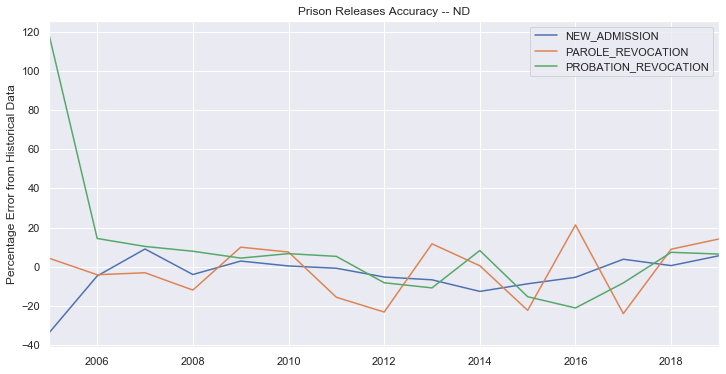

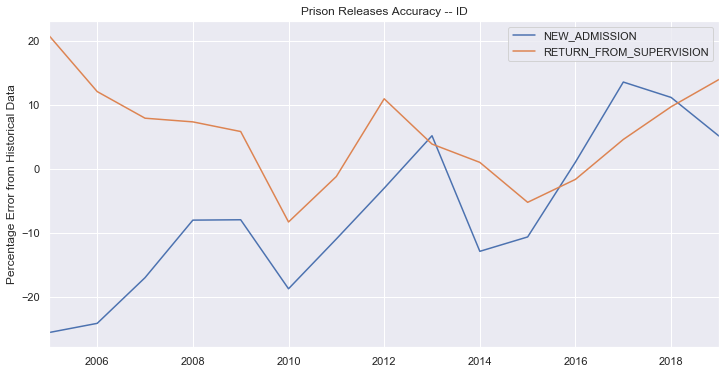

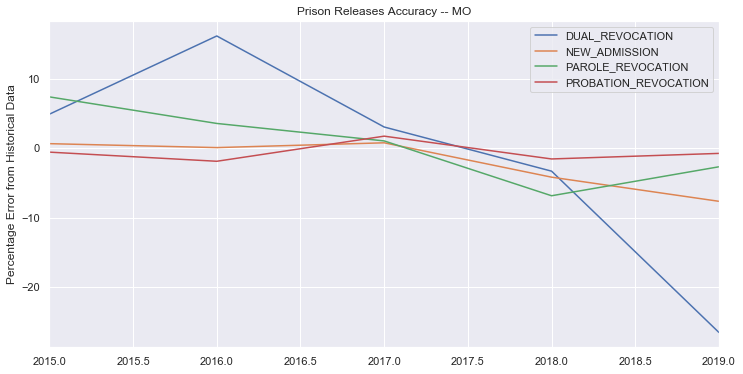

In [5]:
for state in simulations:
    errors[state].plot()
    plt.title(f"Prison Releases Accuracy -- {state}")
    plt.ylabel("Percentage Error from Historical Data")


In [7]:
errors['ND'].abs().mean(axis=0)

NEW_ADMISSION            6.933403
PAROLE_REVOCATION       12.156305
PROBATION_REVOCATION    16.827558
dtype: float64

In [8]:
errors['ID'].abs().mean(axis=0)

NEW_ADMISSION              11.662393
ADMITTED_FROM_SUPERVISION     7.602518
dtype: float64

In [9]:
errors['MO'].abs().mean(axis=0)

DUAL_REVOCATION         10.778293
NEW_ADMISSION            2.667216
PAROLE_REVOCATION        4.302203
PROBATION_REVOCATION     1.283489
dtype: float64

# init testing

initialization time:  0.01592087745666504
simulation_time:  1.8963508605957031
initialization time:  0.020711183547973633
simulation_time:  1.8965697288513184
initialization time:  0.009811878204345703
simulation_time:  1.7759590148925781
initialization time:  0.009130001068115234
simulation_time:  1.8858697414398193
initialization time:  0.0094451904296875
simulation_time:  1.8761217594146729
initialization time:  0.009170055389404297
simulation_time:  1.9782969951629639
initialization time:  0.009790897369384766
simulation_time:  2.001441240310669
initialization time:  0.00939798355102539
simulation_time:  2.0816738605499268
initialization time:  0.009682893753051758
simulation_time:  2.2306199073791504
initialization time:  0.010329246520996094
simulation_time:  2.216627836227417
initialization time:  0.00907588005065918
simulation_time:  2.085188150405884
initialization time:  0.009880781173706055
simulation_time:  2.200885057449341
initialization time:  0.008723020553588867
simula

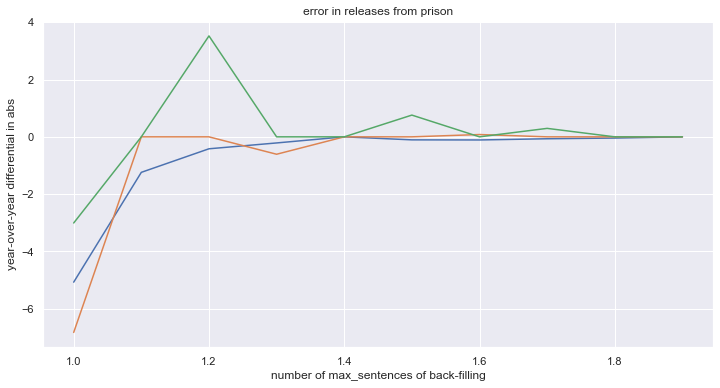

In [5]:
test = SuperSimulation()
test.initialize_data(outflows_data['ND'], transitions_data['ND'], disaggregation_axes)
test.set_user_inputs(user_inputs)
error = test.calculate_cohort_population_error(unit='abs')

Text(0.5, 1.0, 'error in releases from prison -- ND')

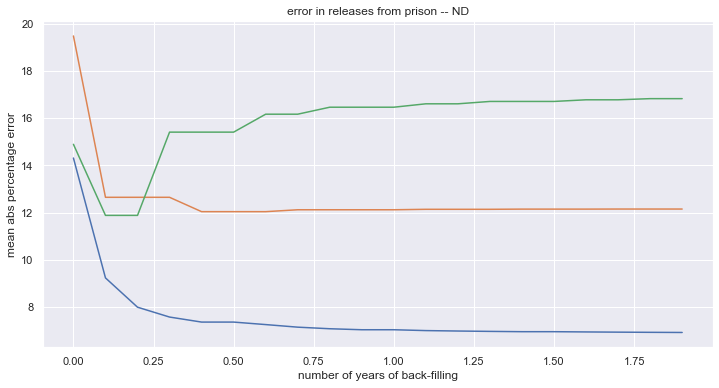

In [6]:
plt.plot(error)
plt.ylabel('mean abs percentage error')
plt.xlabel('number of years of back-filling')
plt.title('error in releases from prison -- ND')

In [ ]:
error.loc[14]

In [ ]:
test = SuperSimulation()
test.initialize_data(outflows_data['ID'], transitions_data['ID'], disaggregation_axes)
test.set_user_inputs(user_inputs)
error = test.calculate_cohort_population_error(back_fill_range=[0,15], unit='abs')

In [ ]:
plt.plot(error)
plt.ylabel('mean abs percentage error')
plt.xlabel('number of years of back-filling')
plt.title('error in releases from prison -- ID')

In [ ]:
error.loc[14]

In [ ]:
test = SuperSimulation()
test.initialize_data(outflows_data['MO'], transitions_data['MO'], disaggregation_axes)
test.set_user_inputs(user_inputs)
error = test.calculate_cohort_population_error(back_fill_range=[0,15], unit='abs')

In [ ]:
plt.plot(error)
plt.ylabel('mean abs percentage error')
plt.xlabel('number of years of back-filling')
plt.title('error in releases from prison -- MO')

In [ ]:
error.loc[14]

# data sparsity testing

In [ ]:
sparsity_test = SuperSimulation()
sparsity_test.initialize_data(outflows_data['ND'], transitions_data['ND'], disaggregation_axes)
sparsity_test.set_user_inputs(user_inputs)
error = sparsity_test.calculate_releases_data_sparsity_error(unit='abs')

In [ ]:
initialization_testing_sims = {i:{} for i in range(20)}
for init_period in initialization_testing_sims:
    no_policy_user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': no_policy_df, 'start_year': 2015}
    initialization_testing_sims[init_period]['no_policy_projection'] = population_simulation.PopulationSimulation()
    initialization_testing_sims[init_period]['no_policy_results'] = initialization_testing_sims[init_period]['no_policy_projection'].simulate_sentencing_policies(
        outflows_data['MO'],
        transitions_data['MO'],
        disaggregation_axes, 
        no_policy_user_inputs,
        initialization_period=init_period
    )


In [ ]:
new_admission_errors = pd.DataFrame()
for init_period in initialization_testing_sims:
    new_admission_errors[init_period] = \
        initialization_testing_sims[init_period]['no_policy_projection'].sub_simulations['NEW_ADMISSION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")


In [ ]:
parole_revocation_errors = pd.DataFrame()
for init_period in initialization_testing_sims:
    new_admission_errors[init_period] = \
        initialization_testing_sims[init_period]['no_policy_projection'].sub_simulations['PAROLE_REVOCATION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")


In [ ]:
probabtion_revocation_errors = pd.DataFrame()
for init_period in initialization_testing_sims:
    new_admission_errors[init_period] = \
        initialization_testing_sims[init_period]['no_policy_projection'].sub_simulations['PROBATION_REVOCATION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")


# init testing ND

In [ ]:
initialization_testing_sims = {i:{} for i in range(20)}
for init_period in initialization_testing_sims:
    no_policy_user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': no_policy_df, 'start_year': 2015}
    initialization_testing_sims[init_period]['no_policy_projection'] = population_simulation.PopulationSimulation()
    initialization_testing_sims[init_period]['no_policy_results'] = initialization_testing_sims[init_period]['no_policy_projection'].simulate_sentencing_policies(
        outflows_data['ND'],
        transitions_data['ND'],
        disaggregation_axes, 
        no_policy_user_inputs,
        initialization_period=init_period
    )


In [ ]:
new_admission_errors = pd.DataFrame()
for init_period in initialization_testing_sims:
    new_admission_errors[init_period] = \
        initialization_testing_sims[init_period]['no_policy_projection'].sub_simulations['NEW_ADMISSION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")


# historical data sparsity testing ND

In [ ]:
historical_sparsity_sims = {i:{} for i in range(2005,2016)}
for i in historical_sparsity_sims:
    no_policy_user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': no_policy_df, 'start_year': 2015}
    historical_sparsity_sims[i]['no_policy_projection'] = population_simulation.PopulationSimulation()
    historical_sparsity_sims[i]['no_policy_results'] = historical_sparsity_sims[i]['no_policy_projection'].simulate_sentencing_policies(
        outflows_data['ND'][outflows_data['ND']['year']>= i],
        transitions_data['ND'],
        disaggregation_axes, 
        no_policy_user_inputs,
    )


In [ ]:
new_admission_errors = pd.DataFrame()
for i in historical_sparsity_sims:
    new_admission_errors[i] = \
        historical_sparsity_sims[i]['no_policy_projection'].sub_simulations['NEW_ADMISSION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")


# historical data sparsity testing ID

In [ ]:
historical_sparsity_sims = {i:{} for i in range(2005,2016)}
for i in historical_sparsity_sims:
    no_policy_user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': no_policy_df, 'start_year': 2015}
    historical_sparsity_sims[i]['no_policy_projection'] = population_simulation.PopulationSimulation()
    historical_sparsity_sims[i]['no_policy_results'] = historical_sparsity_sims[i]['no_policy_projection'].simulate_sentencing_policies(
        outflows_data['ID'][outflows_data['ID']['year']>= i],
        transitions_data['ID'],
        disaggregation_axes, 
        no_policy_user_inputs,
    )


In [ ]:
new_admission_errors = pd.DataFrame()
for i in historical_sparsity_sims:
    new_admission_errors[i] = \
        historical_sparsity_sims[i]['no_policy_projection'].sub_simulations['NEW_ADMISSION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")


# historical data sparsity testing MO

In [ ]:
historical_sparsity_sims = {i:{} for i in range(2015,2020)}
for i in historical_sparsity_sims:
    no_policy_user_inputs = {'projection_years': 10, 'policy_year': 2020, 'policy_df': no_policy_df, 'start_year': 2020}
    historical_sparsity_sims[i]['no_policy_projection'] = population_simulation.PopulationSimulation()
    historical_sparsity_sims[i]['no_policy_results'] = historical_sparsity_sims[i]['no_policy_projection'].simulate_sentencing_policies(
        outflows_data['MO'][outflows_data['MO']['year']>= i],
        transitions_data['MO'],
        disaggregation_axes, 
        no_policy_user_inputs,
    )


In [ ]:
new_admission_errors = pd.DataFrame()
for i in historical_sparsity_sims:
    new_admission_errors[i] = \
        historical_sparsity_sims[i]['no_policy_projection'].sub_simulations['NEW_ADMISSION']\
        .simulation_compartments['prison'].error.sort_index(axis=1).transpose()['release']

new_admission_errors.plot()
# plt.title(f"Prison Releases Accuracy -- {state}")
plt.ylabel("Percentage Error from Historical Data")
